In [56]:
from stravalib.client import Client
import pandas as pd
import stravalib
import webbrowser
import matplotlib.pyplot as plt
import math
import requests as r
import httplib
import geopandas
plt.style.use('bmh')

client_id, secret = open('client.secret').read().strip().split(',')
client = stravalib.client.Client()
redirect_uri='http://localhost:8888/'
#redirect_uri='http://localhost'
scope = "activity:read_all"

auth_url = "https://www.strava.com/oauth/authorize?client_id={}&response_type=code&redirect_uri={}&scope={}".format(client_id,redirect_uri,scope)

print auth_url
webbrowser.open(auth_url)

https://www.strava.com/oauth/authorize?client_id=23579&response_type=code&redirect_uri=http://localhost:8888/&scope=activity:read_all


True

In [53]:
import urllib
print(urllib.urlopen(auth_url))

<addinfourl at 140361034386032 whose fp = <socket._fileobject object at 0x7fa85ac63850>>


In [57]:
#webbrowser.open(auth_url)
code='c80ca9310bc4402c74a74812709a252168b0d604'

In [58]:
access_token = client.exchange_code_for_token(client_id=client_id,
                                             client_secret=secret,
                                             code=code)

In [59]:
client = Client(access_token=access_token)
all_acts = client.get_activities() # Get current athlete details
all_acts.limit = 10

In [60]:
for i in all_acts:
    print i

<Activity id=3702618153 name=u'Pettit +1' resource_state=2>
<Activity id=3698869533 name=u'Black' resource_state=2>
<Activity id=3694440908 name=u'Afternoon Activity' resource_state=2>
<Activity id=3688998876 name=u'Bear Creek -4' resource_state=2>
<Activity id=3685876466 name=u'Pettit +1' resource_state=2>
<Activity id=3679382765 name=u'Morning Ride' resource_state=2>
<Activity id=3675865782 name=u'Andover TT' resource_state=2>
<Activity id=3675865993 name=u'Afternoon Ride' resource_state=2>
<Activity id=3675430882 name=u'Afternoon Swim' resource_state=2>
<Activity id=3671631550 name=u'Evening Run' resource_state=2>


In [70]:
types=['time', 'latlng', 'distance', 'altitude', 'velocity_smooth',
'heartrate', 'cadence', 'watts', 'temp', 'moving', 'grade_smooth']

tmp_0 = client.get_activity_streams(3702618153,types=types)

tmp_0.keys()

[u'distance',
 u'watts',
 u'heartrate',
 u'grade_smooth',
 u'moving',
 u'time',
 u'velocity_smooth',
 u'cadence']

In [71]:
''' make tmp_0 into df '''
data_df = pd.DataFrame()
for key in tmp_0.keys():
    data_df[key] = tmp_0[key].data
    
data_df.head(10)

,distance,watts,heartrate,grade_smooth,moving,time,velocity_smooth,cadence
0,0.0,79,60,0.0,True,0,0.0,93
1,4.0,29,61,0.0,True,1,0.0,82
2,8.5,33,62,0.0,True,2,0.0,94
3,13.2,82,65,0.0,True,3,4.4,85
4,17.7,108,67,0.0,True,4,4.4,76
5,21.8,124,69,0.0,True,5,4.4,73
6,26.0,133,72,0.0,True,6,4.4,71
7,30.4,153,77,0.0,True,7,4.4,76
8,34.9,152,77,0.0,True,8,4.3,75
9,39.3,165,79,0.0,True,9,4.3,75


In [72]:
scttr_tmp = pd.DataFrame(tmp_0['latlng'].data)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
c = tmp_0['heartrate'].data
tst = ax.scatter(scttr_tmp[1],scttr_tmp[0],c=c, cmap='RdYlGn_r', s=3)
ax.axis('equal')
plt.colorbar(tst, ax=ax)

KeyError: 'latlng'

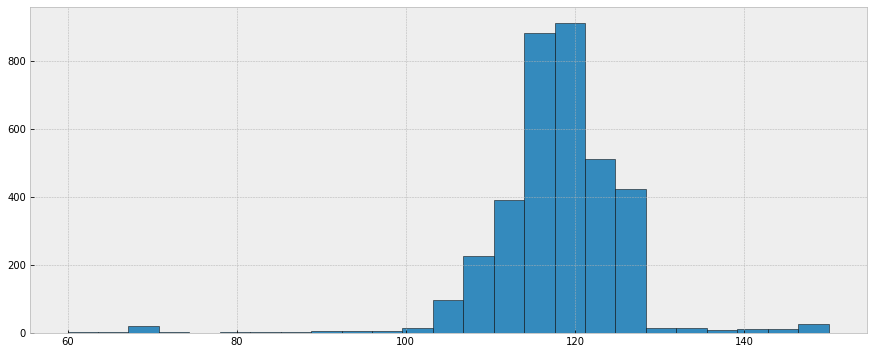

In [73]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.hist(data_df['heartrate'], bins=25, edgecolor='black');

In [74]:
def plot_seriesAndmean(series, df = data_df, figsize=(15,6), x_axis = 'distance'):
    series_min, series_max = df[series].min(), df[series].max()
    plt_ylim = (series_min * .9, series_max * 1.1 )
    fig, ax0 = plt.subplots(figsize=figsize)
    # series
    plt.plot(data_df[x_axis], data_df[series], linewidth=.5)
    # mean
    axr = ax0.twinx()
    axr.axhline(df[series].mean(), linestyle=':', linewidth=0.5, color='red')
    # labels
    ax0.set_xlabel(x_axis)
    ax0.set_ylabel(series)
    axr.set_ylabel('average')
    # scales
    ax0.set_ylim(plt_ylim)
    axr.set_ylim(plt_ylim)

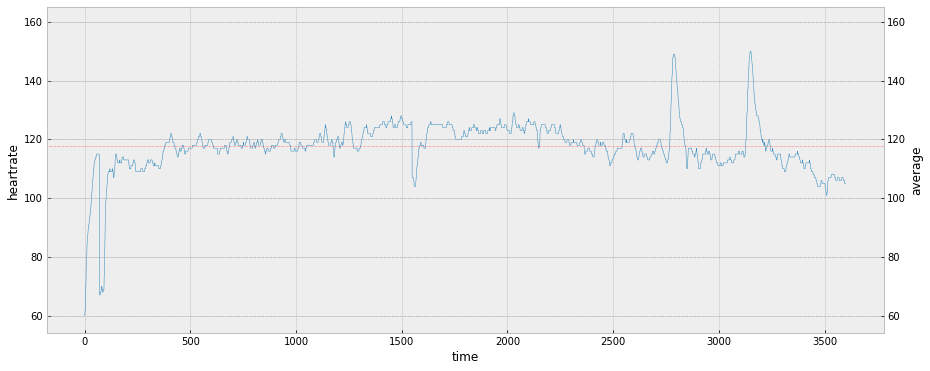

In [79]:
plot_seriesAndmean('heartrate', x_axis='time')

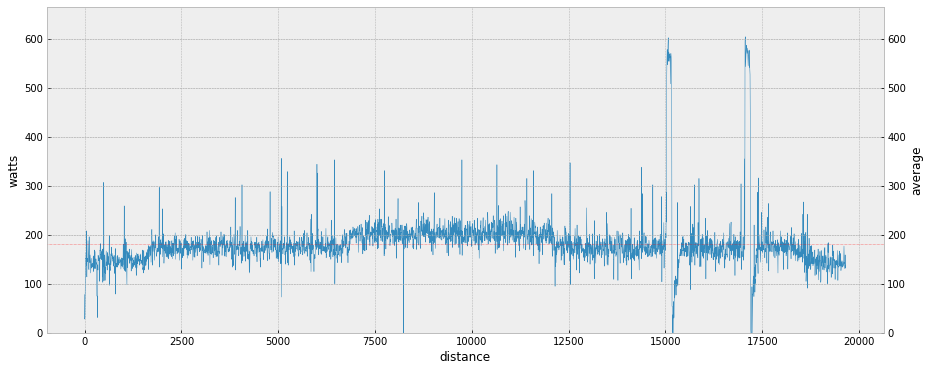

In [75]:
plot_seriesAndmean('watts')

In [76]:
win_dur = 1 # minutes
tst = data_df.watts.rolling(window=(60/4)*win_dur).mean()

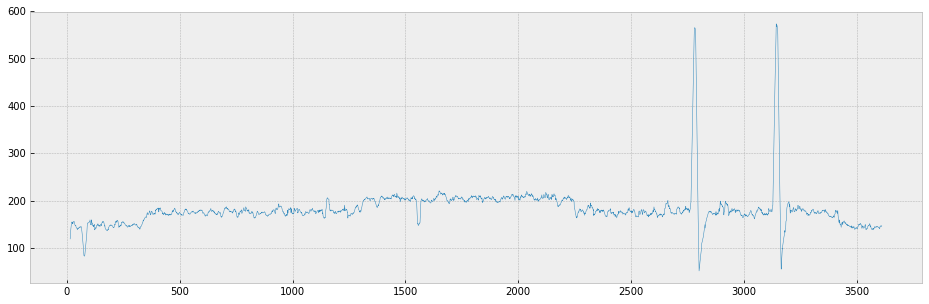

In [77]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(tst, linewidth=.5)

1.03218390805 1.50095754877 1.0


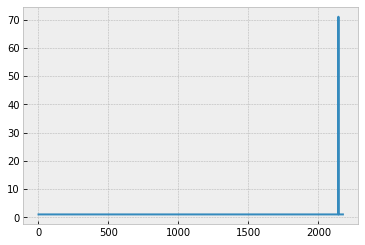

In [69]:
print data_df.time.diff().mean(), data_df.time.diff().std(), data_df.time.diff().median()
plt.plot(data_df.time.diff())